# Yunnan Sourcing Web Scraping
### By Theodore Cheek | [LinkedIn](https://www.linkedin.com/in/theodorecheek/)

### Contents
- 1. [Data Import](#Yunnan-Sourcing-Data-Exploration-&-Cleaning)
- 2. Data Cleaning
    - a. [Structure](#Inspect-&-Clean-Data)
    - b. [Item Type Naming](#Item-Type-Naming)
- 3. [Exploratory Visualization](#Exploratory-Visualizations)
    - a. [General Storefront](#General-Storefront)
    - b. [Storefront Divvied](#Next-Target:-General-Storefront-Divvied-Up!)
    - c. [Pricing Overview](#Overview-&-Some-Fun)
    - d. [Customer Interaction Priorities](#Customer-Priorities-&-Interaction)
    - e. [Tagging Issues](#Tagging-Issues)
- 4. [Pottery Deep Dive](#Selection-1:-Pottery)
    - a. [Brand Inspection](#Pottery-Brand-Inspection)
- 5. [Leaf Tea Deep Dive](#Selection-2:-Teas)
    - a. [Raw Pu-erh Brands](#Raw-Pu-Erh-Brand-Examination)
    - b. [Ripe Pu-erh Brands](#Ripe-Pu-Erh-Brand-Examination)
    - c. [Non-Pu-erh Tea Brands](#Non-Pu-Erh-Brand-Examination)

# Yunnan Sourcing Data Exploration & Cleaning
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

Missing data is not so much the problem; the collection was performed in a naive manner, in order to account for missing data during the scrape - rather than focus on "eliminating duplicates", the focus was on inclusive collection. Therefore there will be a great many duplicates

In [1]:
# Import packages etc.
import pandas as pd
from ast import literal_eval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import the data
ysdat = pd.read_csv('ysscraping.csv')

#### Duplicates there were aplenty
These are largely the result of different "collection" features. Dropping this eliminates the vast majority of duplicates.

NB: The notes section was not collected properly in the scrape, therefore we will drop that for now as there remains yet plenty of data to work with.

In [2]:
ysdat = ysdat.drop(['collection','notes'], axis=1)
ysdat = ysdat.drop_duplicates(subset=['pid'], keep='last', ignore_index=True)

#### Duplicate Elimination
Duplicates can be eliminated according to their order of recording. By selecting "last" entries according to the product ID ('pid'), we can effectively retain the most up-to-date data.

## Inspect & Clean Data

[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


In [3]:
ysdat.head()

,amount,brand,display_price,item_name,item_type,pid,pricing,review_dates,review_helpful,review_names,review_scores,review_texts,review_titles,review_unhelpful,starscore,tags,wishlist_score
0,1 Unit,Wang Ting,$88.00 USD,"Da Hong Pao Clay ""Jin Zhong"" Yixing Teapot by ...",Yixing Pottery,1293783138372,NaN,"02/21/20,03/13/19,03/08/19,06/08/18","[0, 3, 0, 2, 2]","Jeff G.,l w.,Karen H.,LW,Olek","[5, 5, 5, 5]",This pot achieves pretty much everything you w...,"Perfect little pot,1-2 Person Pot,Sweet Little...","[0, 0, 1, 0, 0]",5.0,"150ml,,Da Hong Pao Clay,,Jin Zhong Style,,Wang...",0
1,1 Unit,Yunnan Sourcing Tea Shop,$96.00 USD,"Qing Hui Ni Clay ""De Zhong"" Yixing Teapot by T...",Yixing Pottery,1458561974375,NaN,NaN,[1],"Christian G.,Store Owner",NaN,NaN,NaN,[0],0.0,"200ml,,Qing Hui Ni Clay,,Tan Jun,,yixing clay,...",0
2,1 Unit,Wang Ting,$85.00 USD,"Qing Shui Ni Clay ""Gao Shi Piao"" Yixing Teapot...",Yixing Pottery,1294717222980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"230ml,,Qing Shui Ni Clay,,Shi Piao Style,,yixi...",0
3,1 Unit,Wang Ting,$88.00 USD,"Jiang Po Ni Clay ""Han Deng"" Yixing Teapot by W...",Yixing Pottery,2215753515111,NaN,"09/12/20,02/09/20","[0, 0]","Aleksei K.,Michael P.",NaN,"I have plenty of Yixing teapots, I don't even ...","BEST OF THE BEST FOR SHOU PUERH,Looks very nice","[0, 0]",5.0,"190ml,,Jiang Po Ni Clay,,Wang Ting,,Yixing Teapot",0
4,1 Unit,Wang Ting,$132.00 USD,"Jiao Ni ""Fang Gu"" Yixing Clay Teapot * 200ml",Yixing Pottery,2187301421159,NaN,09/12/19,[0],Desmond T.,NaN,"Very beautiful Yixing, feel good looking at it.",Beautiful teapot,[0],5.0,"200ml,,Jiao Ni,,Teapot,,Yixing Teapot",0


In [4]:
ysdat.shape

(2030, 17)

In [5]:
ysdat['pid'] = ysdat['pid'].astype(str)

### Listify Broken Lists
A number of elements were parsed incorrectly into the .csv file. Here we fix them

In [6]:
ysdat['pricing'] = ysdat['pricing'].apply(lambda x: [] if pd.isnull(x) else x.split(','))
ysdat['review_dates'] = ysdat['review_dates'].apply(lambda x: [] if pd.isnull(x) else x.split(','))
ysdat['review_titles'] = ysdat['review_titles'].apply(lambda x: [] if pd.isnull(x) else x.split(','))
ysdat['review_names'] = ysdat['review_names'].apply(lambda x: [] if pd.isnull(x) else x.split(','))
ysdat['tags'] = ysdat['tags'].apply(lambda x: [] if pd.isnull(x) else x.split(',,'))

#### Correct Imported Syntagma
Whilst the above elements failed to be encoded as lists, the following were imported as strings, yet with the correct syntax. Thus we can import literal_eval to correct the interpretation

In [7]:
ysdat['review_helpful'] = ysdat['review_helpful'].apply(lambda x: [] if pd.isnull(x) else literal_eval(x))
ysdat['review_unhelpful'] = ysdat['review_unhelpful'].apply(lambda x: [] if pd.isnull(x) else literal_eval(x))
ysdat['display_price'] = ysdat['display_price'].replace('[\$,a-zA-Z ]', '', regex=True).astype(float)


In [8]:
ysdat.head()

,amount,brand,display_price,item_name,item_type,pid,pricing,review_dates,review_helpful,review_names,review_scores,review_texts,review_titles,review_unhelpful,starscore,tags,wishlist_score
0,1 Unit,Wang Ting,88.0,"Da Hong Pao Clay ""Jin Zhong"" Yixing Teapot by ...",Yixing Pottery,1293783138372,[],"[02/21/20, 03/13/19, 03/08/19, 06/08/18]","[0, 3, 0, 2, 2]","[Jeff G., l w., Karen H., LW, Olek]","[5, 5, 5, 5]",This pot achieves pretty much everything you w...,"[Perfect little pot, 1-2 Person Pot, Sweet Lit...","[0, 0, 1, 0, 0]",5.0,"[150ml, Da Hong Pao Clay, Jin Zhong Style, Wan...",0
1,1 Unit,Yunnan Sourcing Tea Shop,96.0,"Qing Hui Ni Clay ""De Zhong"" Yixing Teapot by T...",Yixing Pottery,1458561974375,[],[],[1],"[Christian G., Store Owner]",NaN,NaN,[],[0],0.0,"[200ml, Qing Hui Ni Clay, Tan Jun, yixing clay...",0
2,1 Unit,Wang Ting,85.0,"Qing Shui Ni Clay ""Gao Shi Piao"" Yixing Teapot...",Yixing Pottery,1294717222980,[],[],[],[],NaN,NaN,[],[],0.0,"[230ml, Qing Shui Ni Clay, Shi Piao Style, yix...",0
3,1 Unit,Wang Ting,88.0,"Jiang Po Ni Clay ""Han Deng"" Yixing Teapot by W...",Yixing Pottery,2215753515111,[],"[09/12/20, 02/09/20]","[0, 0]","[Aleksei K., Michael P.]",NaN,"I have plenty of Yixing teapots, I don't even ...","[BEST OF THE BEST FOR SHOU PUERH, Looks very n...","[0, 0]",5.0,"[190ml, Jiang Po Ni Clay, Wang Ting, Yixing Te...",0
4,1 Unit,Wang Ting,132.0,"Jiao Ni ""Fang Gu"" Yixing Clay Teapot * 200ml",Yixing Pottery,2187301421159,[],[09/12/19],[0],[Desmond T.],NaN,"Very beautiful Yixing, feel good looking at it.",[Beautiful teapot],[0],5.0,"[200ml, Jiao Ni, Teapot, Yixing Teapot]",0


### Finer Data Cleaning

In [9]:
print(ysdat['item_type'].unique())

['Yixing Pottery' 'Silver Teapots and Wares' 'Jian Shui Pottery'
 'Teawares' 'Hei Cha' 'Raw Pu-erh Tea' 'Ripe Pu-erh Tea'
 'Qin Zhou Pottery' '$0.10-$0.149/g,' 'Chaozhou Hong Ni' 'White Tea'
 '180ml,' 'Coaster,' 'Ripe Pu-Erh Tea' 'Ceramic Cha Hai,'
 'Hua Ning Pottery' 'Tea Sampler' 'Packaging' 'cha bu' 'Ceramic Gaiwan,'
 'Gift Box,' 'Hand-Made Blooming Teas' 'Black Tea' 'Flower and Herbal Tea'
 'Tea Towel,' 'Bamboo Charcoal' 'Tea Club Box' 'gift,' 'Oolong Tea'
 'Yellow Tea' 'Green Tea' 'Purple Tea' 'Pu-erh Tea' 'Dragon Ball' '2019,']


### Item Type Naming
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

As we can see above, the item types, which will provide useful overview data in our visualizations are not clean, particularly with regards to notation of Pu-erh tea itself. With further examination of the website, I have ascertained the following:
- There is solely 1 entry under 'Pu-erh Tea,' suggesting it's an error
- Ripe Pu-Erh and Ripe Pu-erh (note the capitalization) both contribute to sizeable numbers of items, suggesting that they both cover the correct items, but suffer from consistent typos

Therefore, we will rename the former to a Tea Sampler (the item is a Tea Sampler Set) and we will correct the capitalization of the latter.

In [10]:
ysdat['item_type'] = ysdat['item_type'].apply(lambda x: 'Tea Sampler' if x == 'Pu-erh Tea' else x)
ysdat['item_type'] = ysdat['item_type'].apply(lambda x: 'Ripe Pu-erh Tea' if x == 'Ripe Pu-Erh Tea' else x)
ysdat['item_type'] = ysdat['item_type'].apply(lambda x: 'Gift Card' if x == 'gift,' else x)
ysdat['item_type'] = ysdat['item_type'].apply(lambda x: 'Gift Box' if x == 'Gift Box,' else x)

ysdat['item_type'].unique()

array(['Yixing Pottery', 'Silver Teapots and Wares', 'Jian Shui Pottery',
       'Teawares', 'Hei Cha', 'Raw Pu-erh Tea', 'Ripe Pu-erh Tea',
       'Qin Zhou Pottery', '$0.10-$0.149/g,', 'Chaozhou Hong Ni',
       'White Tea', '180ml,', 'Coaster,', 'Ceramic Cha Hai,',
       'Hua Ning Pottery', 'Tea Sampler', 'Packaging', 'cha bu',
       'Ceramic Gaiwan,', 'Gift Box', 'Hand-Made Blooming Teas',
       'Black Tea', 'Flower and Herbal Tea', 'Tea Towel,',
       'Bamboo Charcoal', 'Tea Club Box', 'Gift Card', 'Oolong Tea',
       'Yellow Tea', 'Green Tea', 'Purple Tea', 'Dragon Ball', '2019,'],
      dtype=object)

### Oddities

While useful, the 'item_type' category seems to have some problematic items indicative of inconsistent scraping or data entry on the part of the business. Amongst them are items whose types include a comma (suggesting from the design of the website that no type was listed and the xpath grabbed elements of the tags, which *are* separated by commas) and overly specific types.

Depending on the amount of data involved, correcting fewer than 20 data may not be useful and, in the processing stages, could well be avoided by eliminating types of data containing extremely few observations. However, given the relatively small number of data involved here (just more than 2000 observations) and that many of these items are considered luxury or upper end, I have elected to invest some effort in drilling down these points.

#### Specifics

Exploration of many of these extraneous 'types' yields results of only one or two products at a time, supporting the theory above. In order to ascertain their correct labeling, study of their results here is most effective when paired with further study of the website itself.

For example, the case of the item type '$0.10-$0.149/g,'

In [11]:
ysdat.loc[ysdat['item_type']=='$0.10-$0.149/g,']

,amount,brand,display_price,item_name,item_type,pid,pricing,review_dates,review_helpful,review_names,review_scores,review_texts,review_titles,review_unhelpful,starscore,tags,wishlist_score
24,1 Unit,Yunnan Sourcing Tea Shop,45.0,"2011 Lao Man'e Brand ""Te Ji"" Certified Organic...","$0.10-$0.149/g,",6119611695303,"[1 Cake (400 Grams) - $45.00 USD, 25 Grams Sam...",[],[],[],NaN,NaN,[],[],0.0,"[$0.10-$0.149/g, 2011, 400 Grams, Aged Raw Pu-...",13
45,1 Unit,Yunnan Sourcing Tea Shop,40.0,"2007 Haiwan ""Chun Xiang"" Ripe Pu-erh Tea Cake","$0.10-$0.149/g,",4561705140327,"[1 Cake (357 Grams) - $40.00 USD, 25 Grams Sam...",[],[],[],NaN,NaN,[],[],0.0,"[$0.10-$0.149/g, 2007, 357 Grams, Aged Ripe Pu...",13


The tags indicate that these are separate types of Pu-erh tea, therefore, we can reassign their types effectively.

In [12]:
ysdat.loc[ysdat['pid']=='6119611695303', 'item_type'] = 'Raw Pu-erh Tea'
ysdat.loc[ysdat['pid']=='4561705140327', 'item_type'] = 'Ripe Pu-erh Tea'
ysdat['item_type'].unique()

array(['Yixing Pottery', 'Silver Teapots and Wares', 'Jian Shui Pottery',
       'Teawares', 'Hei Cha', 'Raw Pu-erh Tea', 'Ripe Pu-erh Tea',
       'Qin Zhou Pottery', 'Chaozhou Hong Ni', 'White Tea', '180ml,',
       'Coaster,', 'Ceramic Cha Hai,', 'Hua Ning Pottery', 'Tea Sampler',
       'Packaging', 'cha bu', 'Ceramic Gaiwan,', 'Gift Box',
       'Hand-Made Blooming Teas', 'Black Tea', 'Flower and Herbal Tea',
       'Tea Towel,', 'Bamboo Charcoal', 'Tea Club Box', 'Gift Card',
       'Oolong Tea', 'Yellow Tea', 'Green Tea', 'Purple Tea',
       'Dragon Ball', '2019,'], dtype=object)

After further study of the website and these types, the following assignments can be made similarly.

In [13]:
ysdat.loc[ysdat['item_type']=='180ml,', 'item_type'] = 'Yixing Pottery' #yixing pot
ysdat.loc[ysdat['item_type']=='cha bu', 'item_type'] = 'Teawares' # tea towel
ysdat.loc[ysdat['item_type']=='2019,', 'item_type'] = 'Raw Pu-erh Tea' # raw pu-erh
ysdat.loc[ysdat['item_type']=='Ceramic Cha Hai,', 'item_type'] = 'Teawares' # Random ceramic gaiwan
ysdat.loc[ysdat['item_type']=='Coaster,', 'item_type'] = 'Teawares' # Inlaid coaster, not pottery
ysdat.loc[ysdat['item_type']=='Tea Towel,', 'item_type'] = 'Teawares' # another tea towel
ysdat.loc[ysdat['item_type']=='Dragon Ball', 'item_type'] = 'Tea Sampler' # dragon ball is a common tea subtype
ysdat.loc[ysdat['item_type']=='Ceramic Gaiwan,', 'item_type'] = 'Teawares'# another gaiwan

ysdat['item_type'].unique()

array(['Yixing Pottery', 'Silver Teapots and Wares', 'Jian Shui Pottery',
       'Teawares', 'Hei Cha', 'Raw Pu-erh Tea', 'Ripe Pu-erh Tea',
       'Qin Zhou Pottery', 'Chaozhou Hong Ni', 'White Tea',
       'Hua Ning Pottery', 'Tea Sampler', 'Packaging', 'Gift Box',
       'Hand-Made Blooming Teas', 'Black Tea', 'Flower and Herbal Tea',
       'Bamboo Charcoal', 'Tea Club Box', 'Gift Card', 'Oolong Tea',
       'Yellow Tea', 'Green Tea', 'Purple Tea'], dtype=object)

## Tagging Issues
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


In [14]:
# pot_tags = yspottery['tags'].explode().unique()
# ltags = ysteaware['tags'].explode().unique().tolist()

all_tags = ysdat['tags'].explode().unique()
len(all_tags)

883

In [15]:
print(all_tags)

['150ml' 'Da Hong Pao Clay' 'Jin Zhong Style' 'Wang Ting' 'yixing clay'
 'Yixing Teapot' '200ml' 'Qing Hui Ni Clay' 'Tan Jun' '230ml'
 'Qing Shui Ni Clay' 'Shi Piao Style' '190ml' 'Jiang Po Ni Clay' 'Jiao Ni'
 'Teapot' 'Duan Ni Clay' '220ml' 'Xu Jin' '60ml' 'Clay Teapot'
 'Hei Jin Gang Clay' 'Wan Hu' 'Zi Ni Clay' 'zi sha' 'Pure Silver'
 'Silver and Porcelain' 'Tea Set' 'Tea Table' '155ml' '160ml' 'Jian Shui'
 'Jian Shui Clay' 'Jian Shui Cup' 'Lotus' 'Ceramic Gaiwan' 'gaiwan' 'Red'
 '$0.10-$0.149/g' '2012' 'An Hua' 'Hei Cha Zhuan' 'Hua Zhuan' 'Hunan'
 'Hunan Storage' 'Qian Liang' 'Sample Available' 'Single-Estate'
 'Spring Harvest' '$0.90-$0.99/g' '100 Grams' '2000' 'Aged Raw Pu-erh'
 'Baoshan' 'Guangdong Storage' 'Other Factories' 'Tuo' 'Gaiwan' 'Jianzhan'
 '$0.15-$0.199/g' '2007' '400 grams' 'Bu Lang' 'Cake' 'Kunming Storage'
 'Menghai' '2008' '357 grams' 'Aged Ripe Pu-erh' '2014' 'gift box'
 'Gift Set' 'Jinggu' 'Fortune is Smiling' 'Mascot' 'Mascots' 'Pi Xiu Pair'
 'statue' 'Tea Masc

# Exploratory Visualizations
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

The teawares category is extremely general and contains the full range of tea-related wares, many of which are represented in the pottery collections. It may be useful to subset the teawares by their tags

Amongst the general types of items, there are represented, however, a number of specific subsets of tea and teawares that may be useful to study with regards to the higher end of pricing and quality.

In [16]:
# Selection lists
pottery = ['Yixing Pottery', 'Silver Teapots and Wares',
           'Jian Shui Pottery', 'Qin Zhou Pottery', 'Hua Ning Pottery',
           'Ceramic Gaiwan', 'Chaozhou Hong Ni', 'Ceramic Cha Hai', 
           'Teawares']

leaftea = ['Hei Cha', 'Raw Pu-erh Tea', 'Ripe Pu-erh Tea',
           'White Tea', 'Hand-Made Blooming Teas', 'Black Tea',
           'Flower and Herbal Tea', 'Oolong Tea', 'Yellow Tea', 
           'Green Tea', 'Purple Tea']

gifts = ['Tea Sampler', 'Gift Box', 'Tea Club Box', 'Gift Card']

# Curate the Selections of YSDAT
yspottery = ysdat.loc[ysdat['item_type'].isin(pottery)]
ysleaftea = ysdat.loc[ysdat['item_type'].isin(leaftea)]
ysgifts = ysdat.loc[ysdat['item_type'].isin(gifts)]

In [17]:
ysdat.loc[ysdat['item_type'] == 'Yellow Tea']

,amount,brand,display_price,item_name,item_type,pid,pricing,review_dates,review_helpful,review_names,review_scores,review_texts,review_titles,review_unhelpful,starscore,tags,wishlist_score
993,50 Grams,Yunnan Sourcing Tea Shop,6.50,"Certified Organic ""Fancy Grade Yunnan Yellow Tea""",Yellow Tea,1405921919079,"[50 Grams / Spring 2020 - $6.50 USD, 50 Grams ...","[12/10/20, 11/12/20, 09/10/20, 04/19/20, 11/24...","[0, 0, 0, 0, 0, 0]","[Andre, SC, Vanessa M., Vadim C., Zdravko S., ...","[5, 5, 5, 5, 5]","Very good tea indeed.,Incredibly delicious tea...","[Very good, Incredibly delicious!, Delicious, ...","[0, 0, 0, 0, 1, 0]",4.8,"[$0.10-$0.149/g, 2019, 2020, Certified Organic...",34
1012,50 Grams,Yunnan Sourcing Tea Shop,13.50,"Certified Organic ""Emperor's Yellow"" Yunnan Ye...",Yellow Tea,116953415701,"[50 Grams / Autumn 2020 - $13.50 USD, 100 Gram...","[08/24/19, 06/05/18, 03/29/18, 02/16/18]","[0, 1, 1, 2]","[Ta J., Dickinson, Liquid T., Peter B.]","[5, 5, 5, 5]","I love it because of its fragrant, especially ...","[It is so fragrant !, Golden tea, Pleasantly S...","[1, 0, 0, 1]",5.0,"[$0.25-$0.299/g, 2020, Autumn Harvest, Certifi...",49
1453,50 Grams,Yunnan Sourcing Tea Shop,7.75,"Certified Organic ""Yunnan Yellow Tea""",Yellow Tea,1293634043972,"[50 Grams / Spring 2020 - $7.75 USD, 50 Grams ...",[08/24/19],[0],[Hogosha T.],NaN,"The appearance of the buds and leaves, their s...",[Delicious],[0],5.0,"[$0.10-$0.149/g, 2019, 2020, Certified Organic...",56


### General Storefront
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


Our first goal is to get a general idea, programmatically, of what we're looking at here: what can we glean from a naive look at the store front and its offerings?

In [18]:
# categorize types generally & eliminate extreme outliers in price
ysbreakdown = ysdat.assign(gen_cat = ['Leaf Teas' if item in leaftea else 'Non-Tea' for item in ysdat['item_type']])
ysbreakdown = ysbreakdown.loc[ysbreakdown.loc[:,['display_price']].apply(lambda x: \
                np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
ysbreakdown = ysbreakdown.assign(total_revs = [len(revs) for revs in ysbreakdown['review_titles']])

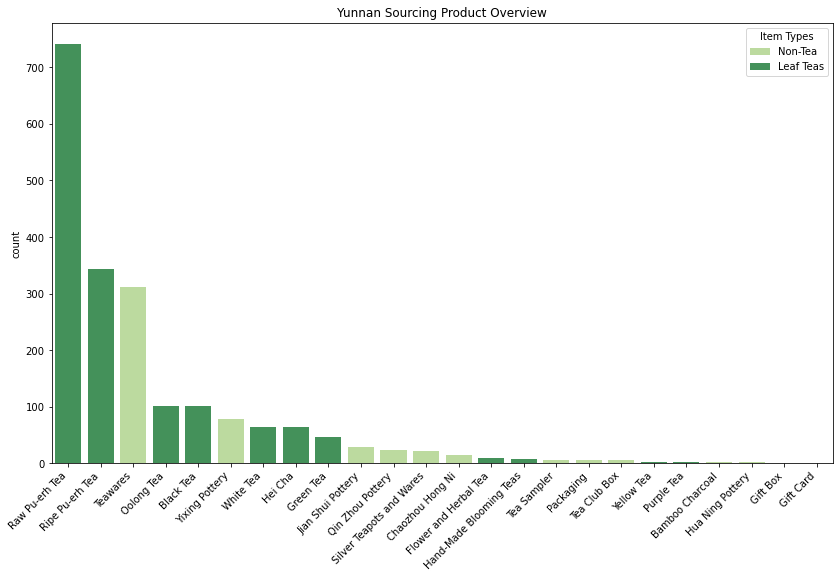

In [19]:
# prepare a simple visualization binning and counting item types
fig1,ax = plt.subplots(figsize=(14,9))
sns.countplot(data = ysbreakdown, x = 'item_type', dodge = False, palette = 'YlGn',
            hue = 'gen_cat', order = ysbreakdown['item_type'].value_counts().index)
fig1.autofmt_xdate(rotation=45)
plt.title('Yunnan Sourcing Product Overview')
plt.xlabel('')
plt.legend(labels = ['Non-Tea','Leaf Teas'], title = 'Item Types')
#plt.savefig('YS1a - Products')

### Contextualize Item Types

What we already see is that there is an incredible wealth of Pu-erh items on the shop, Raw in particular. Given that this is a Yunnan specialty and a niche sourcing specialty, this is relatively unsurprising.

Teawares, however, is an odd category, which we have not yet dwelled upon. Cursory investigation reveals that it is an extremely broad category, including anything from Teapots to Towels. Programmatically there are few good ways to differentiate them, in large part due to human data input:
- Many tea products, otherwise clearly sourced on the Website, are herein rebranded under the Yunnan Sourcing label
- Tagging exists, however, it is often erroneously labeled or entirely omitted from appropriate items

Because tagging is so inconsistent, it would take a great deal more time of hand-tailored data cleaning. It may be a worthy project to return to in the future with more time in hand.

### Outside of Outliers: Main Observation

In general the leaf teas are **generally more populous** than non-teas, but not with a great disparity.

### Next Target: General Storefront Divvied Up!
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


Text(0.5, 0, '')

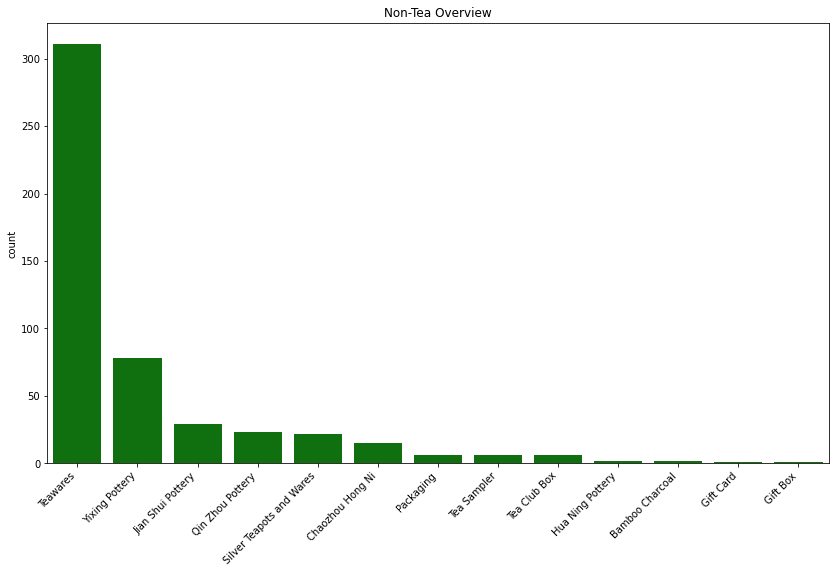

In [20]:
# Non Teas Graphed
fig1,ax = plt.subplots(figsize=(14,9))
sns.countplot(data = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Non-Tea'], 
              x = 'item_type', dodge = False, color = 'Green',
              order = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Non-Tea']['item_type'].value_counts().index)
fig1.autofmt_xdate(rotation=45)
plt.title('Non-Tea Overview')
plt.xlabel('')
#plt.savefig('YS1b - Non-Tea')

Text(0.5, 0, '')

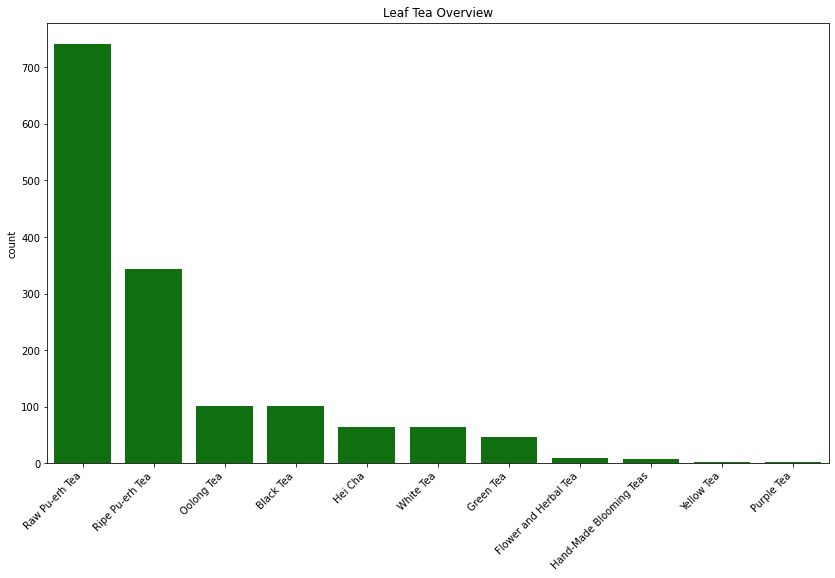

In [21]:
# Leaf Teas Graphed
fig1,ax = plt.subplots(figsize=(14,9))
sns.countplot(data = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Leaf Teas'], 
              x = 'item_type', dodge = False, color = 'Green',
              order = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Leaf Teas']['item_type'].value_counts().index)
fig1.autofmt_xdate(rotation=45)
plt.title('Leaf Tea Overview')
plt.xlabel('')
#plt.savefig('YS1c - Leaf Teas')

### Overview & Some Fun

[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


With the above graphs, we do see some patterns of store-side prioritization:
- **Non-Teas**: Generally, non-pottery items are in the minority (with the exception of Hua Ning Pottery). Not entirely surprising considering that a number of them are store-specific gift items or niche items.
- **Teas**: A lot of Yunnan specialties are very well represented, i.e. Pu-erh, White Tea, and Hei Cha

From here we have an adequate point to dive a little deeper. However, before that, let's just take a brief look at general store pricing to see if we can see any trends leap off the page.

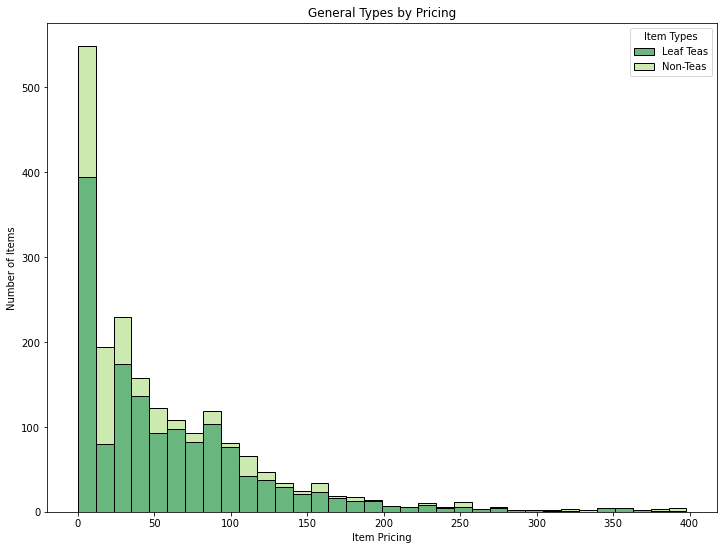

In [22]:
# General Store Pricing Colored by Generalized Item Type
fig1,ax = plt.subplots(figsize=(12,9))
sns.histplot(data = ysbreakdown, x = 'display_price', 
             hue = 'gen_cat', multiple = 'stack', palette = 'YlGn')

# Prettify the labels
plt.title('General Types by Pricing')
plt.xlabel('Item Pricing')
plt.ylabel('Number of Items')
plt.legend(labels = ['Leaf Teas','Non-Teas'], title = 'Item Types')

## Customer Priorities & Interaction
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


For any business examining these data, customer information and priorities would be crucial information. Most of that information would be proprietary, however, we may be able to infer some of it through what we do have.

In our data we were able to glean:
- Product Star Ratings
- Product Wishlist Scoring
- Verified Customer Reviews

**Product Star Ratings** are problematic as they are imbalanced. As you can see below, scoring below 4 stars is extremely rare. It is a common phenomenon of most review-featured sites that customers predominantly score extremely high or low, making relative quality difficult to weigh in general.

**Product Wishlist Scoring** may provide information of a customer base's *aspirational* purchases, but does not necessarily yield information regarding their actual purchases.

**Verified Customer Reviews** are inconsistent in terms of their language and may prove a valuable target for future NLP study, including account for non-English languages. However, these reviews *do* allow us to impute *relative, total, verified purchase interactions*.

Text(0.5, 1.0, 'Non-Tea Customer Reviews by Median')

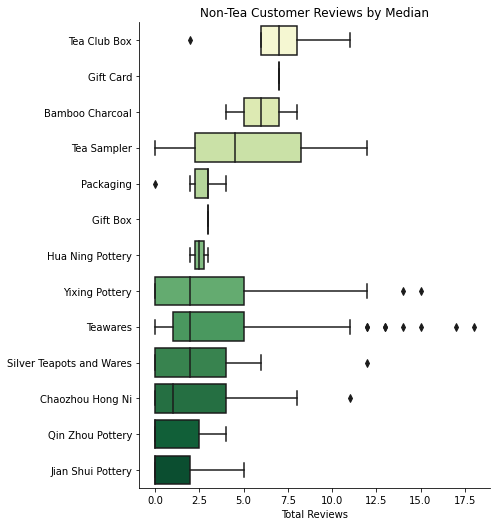

In [23]:
# Non-Tea Customer Review Interactions
ysbreakdown = ysbreakdown.loc[ysbreakdown.loc[:,['total_revs']].apply(lambda x: \
                np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

sns.catplot(data = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Non-Tea'], 
            x = 'total_revs', y = 'item_type', kind = 'box', 
            height = 7, palette = 'YlGn',
            order = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Non-Tea'].groupby('item_type')['total_revs'].agg('median').sort_values(ascending = False).index)
plt.xlabel('Total Reviews')
plt.ylabel('')
plt.title('Non-Tea Customer Reviews by Median')
#plt.savefig('YS2 - Non-Tea Reviews')

Text(0.5, 1.0, 'Tea Customer Reviews')

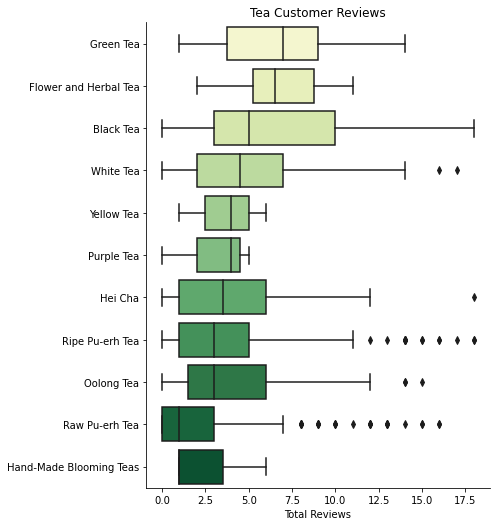

In [24]:
# Leaf Tea Customer Review Interactions
sns.catplot(data = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Leaf Teas'], 
            x = 'total_revs', y = 'item_type', kind = 'box', 
            height = 7, palette = 'YlGn',
            order = ysbreakdown.loc[ysbreakdown['gen_cat'] == 'Leaf Teas'].groupby('item_type')['total_revs'].agg('median').sort_values(ascending = False).index)
plt.xlabel('Total Reviews')
plt.ylabel('')
plt.title('Tea Customer Reviews')
#plt.savefig('YS3 - Tea Customer Reviews')

# Selection 1: Pottery
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)


Whilst not as prevalent as tea on the storefront, Pottery remains a huge presence and has an extremely comparable customer interaction to the teas.

Therefore we shall attempt to drill down on the following:
- Basic Info by Item Type
- Analyze Relative Type Rating vs. Price
- Cross-examine this information by brand

### Looking at Relative Pricing of Different Item Types

As a refresher, we will again survey the general amounts of each type of fine pottery

In [25]:
# Set up and explore relative pottery types
yspottery = yspottery.assign(total_revs = [len(revs) for revs in yspottery['review_titles']])
yspottery['item_type'].value_counts()

Teawares                    311
Yixing Pottery               78
Silver Teapots and Wares     45
Jian Shui Pottery            29
Qin Zhou Pottery             23
Chaozhou Hong Ni             15
Hua Ning Pottery              2
Name: item_type, dtype: int64

In order to begin the inspection proper, we will generate a dataframe, **potbox**, which excludes the extreme price outliers; we are looking at the top-end, however, the extreme top end will not likely be useful information either for charting business trends or for effective visualizations.

In [26]:
# Silver prices are absurdly higher than most & unbalance the graphing
# Eliminate extreme outliers for cleaner graph
potbox = yspottery.loc[yspottery.loc[:, \
        ['display_price']].apply(lambda x: \
                np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

Since general pricing information revealed above failed to give us any insights, our goal here is to further delve into this information on a per-type basis. Using a **Violin Plot** we can effectively include the relative weighting of price distribution across item types.

Text(0.5, 0, 'Item Pricing')

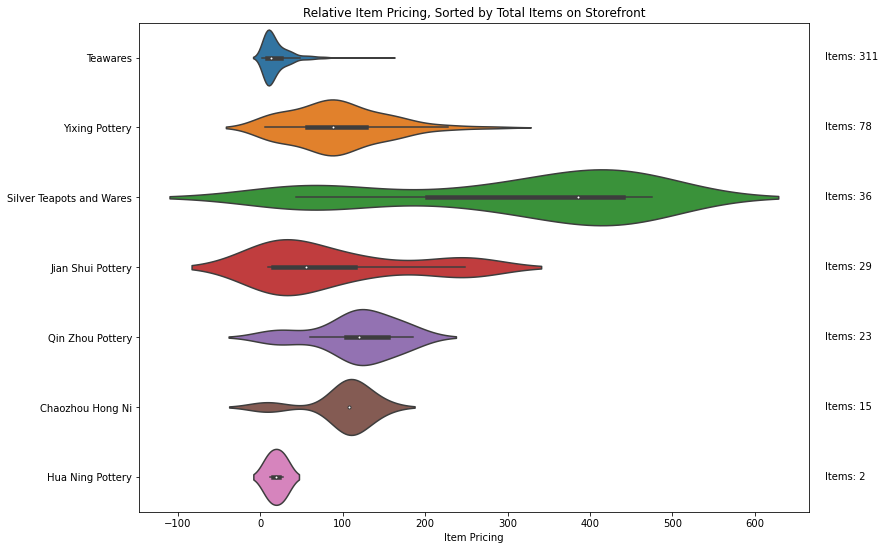

In [27]:
# Chart & Order Violinplot
fig1,ax = plt.subplots(figsize=(12,9))
sns.violinplot(x = 'display_price', y = 'item_type',
             ax = ax, data = potbox, scale = 'width',
             order = ['Teawares', 'Yixing Pottery',
                     'Silver Teapots and Wares',
                     'Jian Shui Pottery', 'Qin Zhou Pottery',
                     'Chaozhou Hong Ni', 'Hua Ning Pottery'])

# Find & Record Observations of Each Item Type
nobs = potbox['item_type'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['Items: ' + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(685, pos[tick] + 0.03, nobs[tick])

# Generate Fancy Labeling
plt.title('Relative Item Pricing, Sorted by Total Items on Storefront')
plt.ylabel('')
plt.xlabel('Item Pricing')

From here we may want to simplify the picture somewhat: rather than including the amounts of items, we can tune our focus purely to that of **median** pricing of items.

Text(0.5, 0, 'Item Pricing')

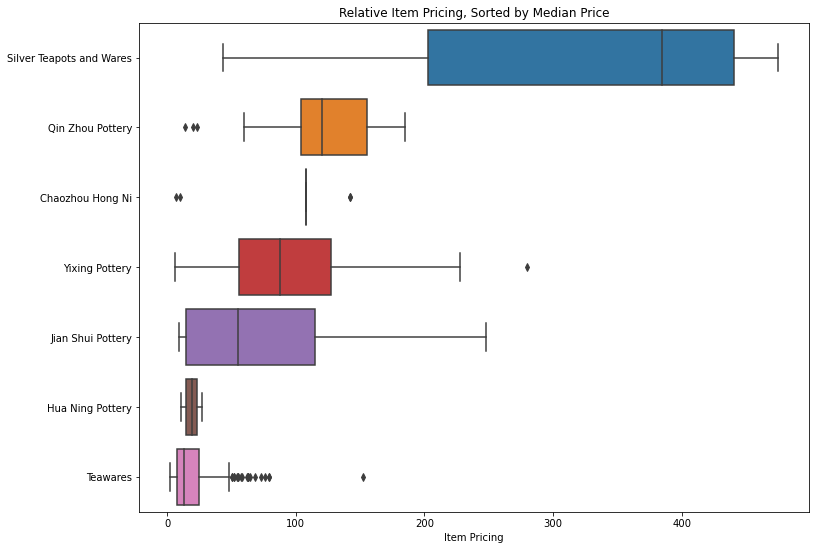

In [28]:
fig1,ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'display_price', y = 'item_type',
             ax = ax, data = potbox,
             order = ['Silver Teapots and Wares', 'Qin Zhou Pottery',
                     'Chaozhou Hong Ni', 'Yixing Pottery',
                     'Jian Shui Pottery','Hua Ning Pottery',
                     'Teawares'])

plt.title('Relative Item Pricing, Sorted by Median Price')
plt.ylabel('')
plt.xlabel('Item Pricing')
#plt.savefig('YS4 - Non-Tea Pricing')

What piques my interest most, however, is the cross section of non-general item pricing and item type popularity distribution. Therefore, what you can see below is a scatterplot of the above item types, excluding the teawares category.

For the sake of visualization consistency, we will inspect the data with the pricing set at the log10 scale. What is most interesting from this visualization is the range of kde distributions:
- **Silver Teapots and Wares** feature an anomalous bump in popularity with some items compared to other item types
- **Silver Teapots and Wares** are generally much more expensive, yet do feature a lower-priced overlap with the rest
- **Yixing Pottery** by far has the thickest tail along the y axis, suggesting that these teawares have a generally higher concentration of customer interaction.
- General pricing distributions all seem normalized, save for the **Jian Shui Pottery**

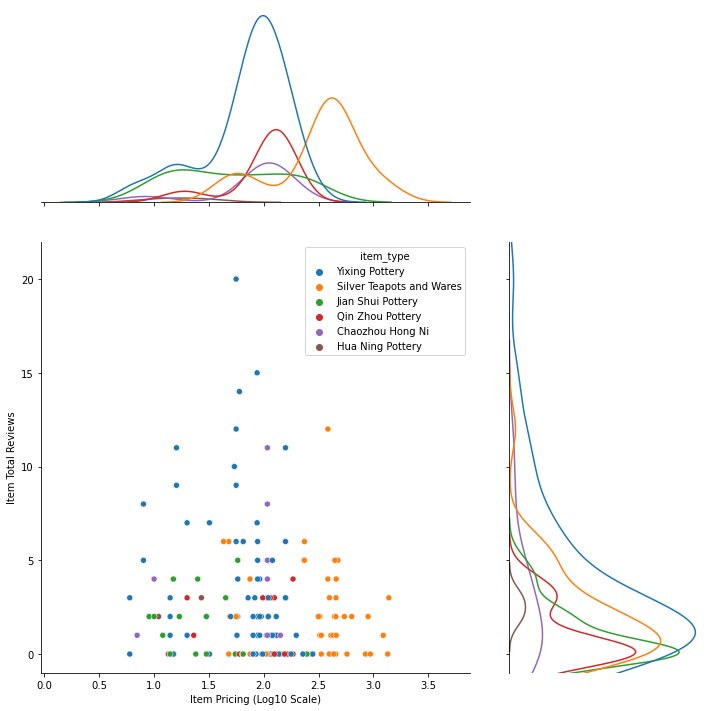

In [29]:
# sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")# use yspottery
notw_pots = yspottery.loc[yspottery['item_type'] != 'Teawares']

sns.jointplot(data = notw_pots, x = np.log10(notw_pots.display_price),
             y = 'total_revs', hue = 'item_type',
             height = 10, marginal_kws = {'fill': False},
             ylim = (-1,22), ratio = 2).set_axis_labels('Item Pricing (Log10 Scale)', 
                                                        'Item Total Reviews')
# plt.savefig('YSEpi 1')

## Pottery Brand Inspection
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

The proper "Sourcing" of teas and teawares is of vital importance to high-end consumers - an element of sales not lost on Yunnan Sourcing, considering its own branding of the term itself. In many cases, they have rebranded items or made the programmatic retrieval of brand names complicated, however, we otherwise still have a great deal of data to examine.

Why do we want to find the important brands? In the case of working for a client in the tea business, it might also be valuable business intelligence to be able to facilitate quality networking: that is the ability to direct our clients to do business directly with the best craftsmen and factories, in time cutting out the middle man, saving on transactional costs.

In order to achieve this superior perspective, we are looking for the intersection of several criteria amongst represented brands:
- Median Pricing of Brand Items
- Customer Interaction (Imputed by Verified Purchase Reviews)
- Mean Star Score of Items
- Mean Wishlist Score (Indicative of Consumer Purchase Aspirations)

In [30]:
# Aggregate the branding information analysis into a dataframe, pbrand
colFun = {'display_price':['count','max','min','mean','median'],
          'starscore':['mean','median'],
          'wishlist_score':['max','min','mean','median'],
          'total_revs':['max','min','mean','median']}

pbrand = yspottery.groupby('brand').agg(colFun)

### Brand Detail Graphs
Philosophically I prefer the impact of deep, albeit clean graphs, which can yield a great deal of potential information. To that end, I intend to employ the jointplot style from Seaborne. 

Graph Description:
What you will see are detailed scatterplots, whose dots represent the individual brands. 
- A **dot's position** on the X axis represents the *Median Pricing of a Brand's Offerings*
- A **dot's position** on the Y axis represents the *Mean Wishlist Score of a Brand's Offerings*
- The **color of a dot** represents the *Mean Star Review Score of a Brand's Offerings*
- The **size of a dot** represents the *Number of Items a Brand Offers on the Storefront*

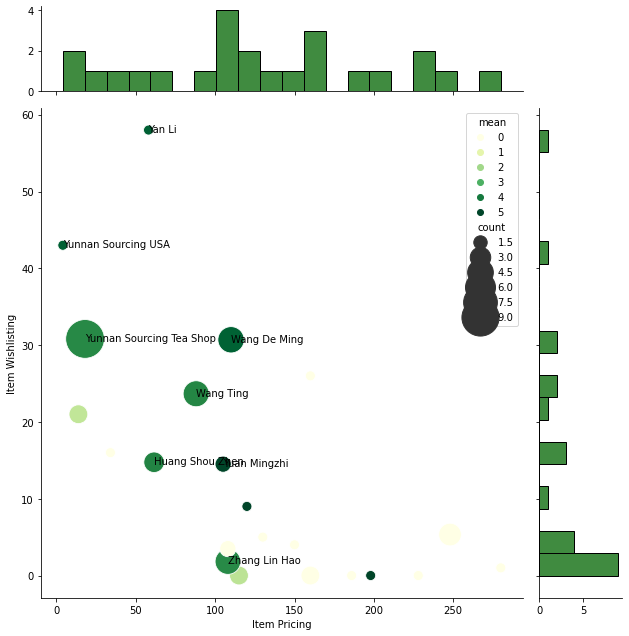

In [31]:
##############################
### Display Pricing X Axis ###
##############################

r = sns.jointplot(data = pbrand, kind = 'scatter', x = pbrand.display_price.loc[:,'median'],
                y = pbrand.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log2(pbrand.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': pbrand.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Item Pricing', 'Item Wishlisting')
# r.ax_joint.legend()

# label the significant brands
topmask = ((pbrand.starscore.loc[:,'mean'] >= 3) & \
            (pbrand.display_price.loc[:,'count'] >= 2))
topbrands = pbrand.loc[topmask].reset_index()
for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.display_price.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')

# label wishlist outliers
wishmask = pbrand.wishlist_score.loc[:,'mean'] > 40
wishbrands = pbrand.loc[wishmask].reset_index()
for i, txt in enumerate(wishbrands['brand'].values):
    r.ax_joint.annotate(txt, (wishbrands.display_price.loc[:,'median'][i],
                      wishbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')

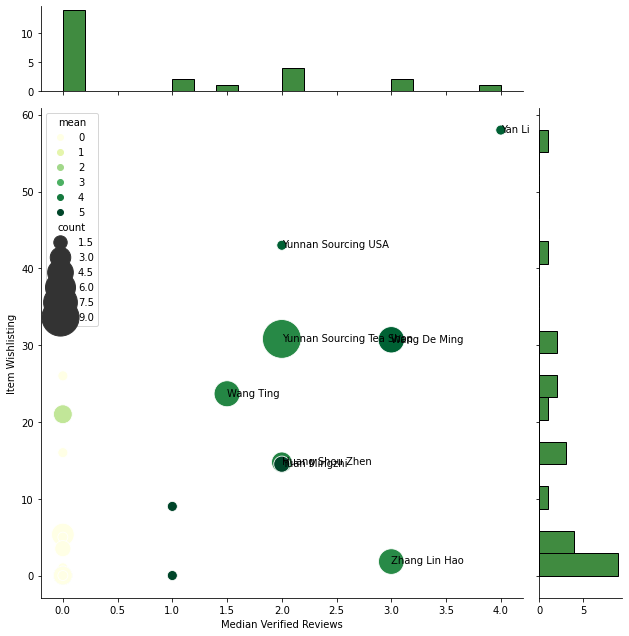

In [32]:
###########################
### Total Review X Axis ###
###########################

r = sns.jointplot(data = pbrand, kind = 'scatter', x = pbrand.total_revs.loc[:,'median'],
                y = pbrand.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log2(pbrand.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': pbrand.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Median Verified Reviews', 'Item Wishlisting')
# r.ax_joint.legend()

# label the significant brands
topmask = ((pbrand.starscore.loc[:,'mean'] >= 3) & \
            (pbrand.display_price.loc[:,'count'] >= 2))
topbrands = pbrand.loc[topmask].reset_index()
for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.total_revs.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')

# label wishlist outliers
wishmask = pbrand.wishlist_score.loc[:,'mean'] > 40
wishbrands = pbrand.loc[wishmask].reset_index()
for i, txt in enumerate(wishbrands['brand'].values):
    r.ax_joint.annotate(txt, (wishbrands.total_revs.loc[:,'median'][i],
                      wishbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
    
# plt.savefig('YSEpi2')

# Selection 2: Teas
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)



Text(0.5, 1.0, 'Non-Puerh Tea Count')

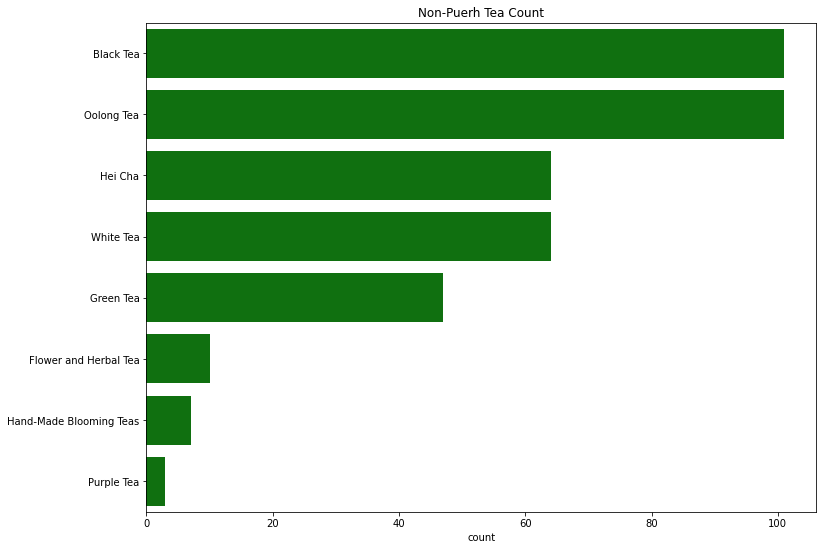

In [33]:
fig1,ax = plt.subplots(figsize=(12,9))

etcteas = ysleaftea.loc[(ysleaftea['item_type'] != 'Ripe Pu-erh Tea') &\
                        (ysleaftea['item_type'] != 'Raw Pu-erh Tea')]

sns.countplot(data = etcteas, y='item_type', color = 'Green',
             order = ['Black Tea', 'Oolong Tea', 'Hei Cha',
                     'White Tea', 'Green Tea',
                     'Flower and Herbal Tea', 'Hand-Made Blooming Teas',
                     'Purple Tea'])

plt.ylabel('')
plt.title('Non-Puerh Tea Count')
#plt.savefig('YS9 - Non-Pu-erh')

This breakdown suggests that our study may be most effective if we separate our studies of Pu-erh from the study of the rest. Dividing into Pu-erh and non-Pu-erh studies.

In [34]:
# add total_revs column for quick engagement analysis
ysleaftea = ysleaftea.assign(total_revs = [len(revs) for revs in ysleaftea['review_titles']])

# set aggregation function
colFun = {'display_price':['count','max','min','mean','median'],
          'starscore':['mean','median'],
          'wishlist_score':['max','min','mean','median'],
          'total_revs':['max','min','mean','median']}

# divide up groups of teas; Raw Pu-erh, Ripe, and Others
rawbrands = ysleaftea.loc[ysleaftea['item_type'] == 'Raw Pu-erh Tea'].groupby('brand').agg(colFun)
ripebrands = ysleaftea.loc[ysleaftea['item_type'] == 'Ripe Pu-erh Tea'].groupby('brand').agg(colFun)
whiteteas = ysleaftea.loc[ysleaftea['item_type'] == 'White Tea']
whitebrands = whiteteas.groupby('brand').agg(colFun)
heiteas = ysleaftea.loc[ysleaftea['item_type'] == 'Hei Cha']
heibrands = heiteas.groupby('brand').agg(colFun)

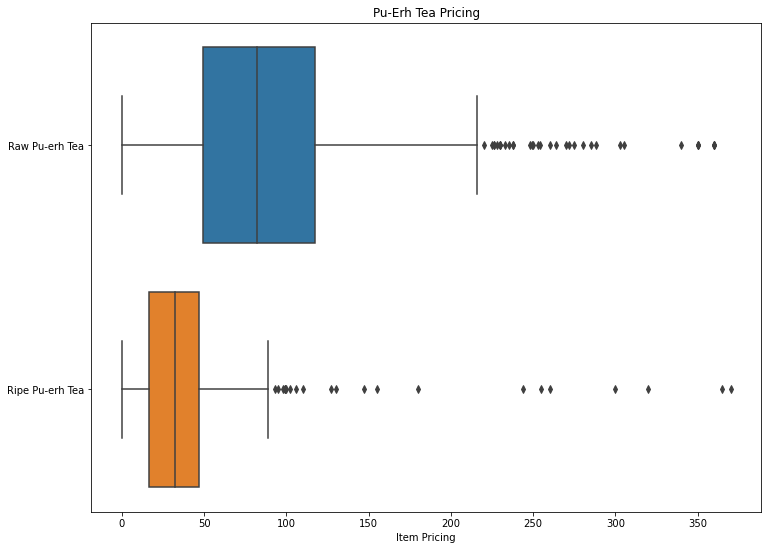

In [35]:
fig1,ax = plt.subplots(figsize=(12,9))
pteas = ysleaftea.loc[(ysleaftea['item_type'] == 'Raw Pu-erh Tea') | (ysleaftea['item_type'] == 'Ripe Pu-erh Tea')]

pteas = pteas.loc[pteas.loc[:, ['display_price']].apply(lambda x: \
                np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

sns.boxplot(x = 'display_price', y = 'item_type',
           data = pteas, ax = ax)

plt.title('Pu-Erh Tea Pricing')
plt.ylabel('')
plt.xlabel('Item Pricing')
# plt.savefig('YS10a - P Pricing')

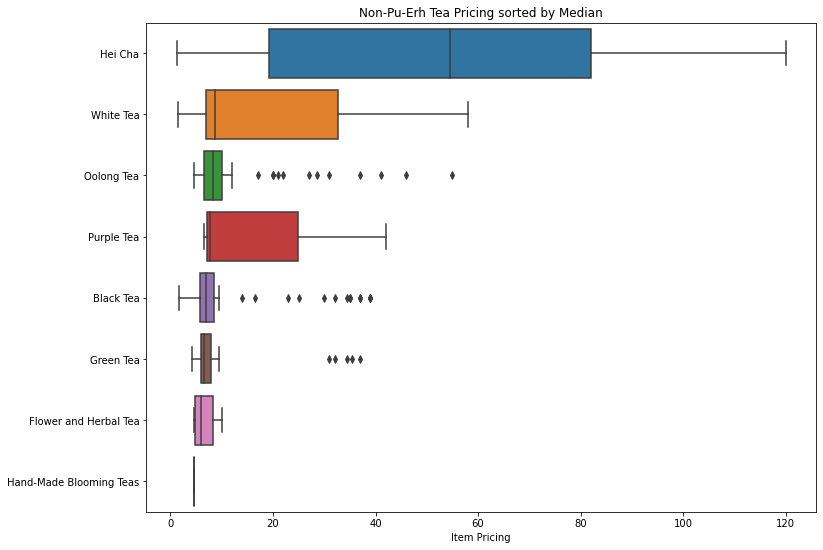

In [36]:
fig1,ax = plt.subplots(figsize=(12,9))
etcteas = ysleaftea.loc[(ysleaftea['item_type']\
                         != 'Raw Pu-erh Tea') & (ysleaftea['item_type'] != 'Ripe Pu-erh Tea')]

etc = etcteas.loc[etcteas.loc[:,['display_price']].apply(lambda x: \
                np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

sns.boxplot(x = 'display_price', y = 'item_type',
              data = etc, ax = ax,
              order = ['Hei Cha', 'White Tea', 'Oolong Tea',
                      'Purple Tea','Black Tea','Green Tea',
                      'Flower and Herbal Tea',
                      'Hand-Made Blooming Teas'])

plt.title('Non-Pu-Erh Tea Pricing sorted by Median')
plt.ylabel('')
plt.xlabel('Item Pricing')
# plt.savefig('YS10b - NP Pricing')

One of the issues we see with tea upon a cursory examination of the website is the complication of pricing: there is a wide range of packaging methods even endemic to individual types that naturally obscures price examination as we did in the case of pottery pricing. Among these variations, we see the following:
- **Loose Leaf by Gram Amount**: This is a common method and is often varied in order to make more expensive teas seem cheaper than they are. We can account for this programmatically, however, the gains in this case would be relatively insignificant in light of other obscuring elements.
- **Brick or Cake**: Particularly in the case of Pu-erh teas, but also with Hei Cha & White Tea, tea will often be sold in traditional form, not often clearly priced per gram, making price comparison in these cases - often the more common tea types on the store front - difficult.
- **Caddy**: Some specialty teas will be sold by "caddy" of tea balls, flowers, or other various formats, again, decoupling tea amounts from tea pricing.

In [37]:
brandins_leaf = ysleaftea.groupby('item_type').agg(['unique'])['brand']
brandins_leaf.columns = ['brands']
brandins_leaf['brands'] = [len(x) for x in brandins_leaf['brands']]
brandins_leaf = brandins_leaf.sort_values(by = 'brands', ascending = False)
# brandins_leaf = brandins_leaf.reset_index()
brandins_leaf

,brands
item_type,
Raw Pu-erh Tea,54
Ripe Pu-erh Tea,44
Hei Cha,13
White Tea,10
Black Tea,3
Oolong Tea,2
Flower and Herbal Tea,1
Green Tea,1
Hand-Made Blooming Teas,1


## Raw Pu-Erh Brand Examination
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

In [38]:
rawbrands.sort_values([('display_price','count'),('wishlist_score','median')], 
                      ascending = False)

display_price                             \
                                        count    max     min        mean   
brand                                                                      
Yunnan Sourcing Brand Pu-erh              441  450.0    0.00  103.029705   
Hai Lang Hao                               47  920.0    9.25  230.026596   
Yunnan Sourcing Tea Shop                   46  700.0    2.00   63.467391   
Shuangjiang Mengku Tea Factory             28  350.0    7.25   87.508929   
Xiaguan Tea Factory                        22  180.0    5.00   36.081818   
Bao He Xiang Brand                         19  249.0   55.00  123.210526   
Menghai Tea Factory                        18  230.0    5.60   57.005556   
CNNP                                       11  160.0   22.00   96.090909   
Nan Jian Tu Lin Brand                      10   82.0    8.50   38.950000   
Other Factories                             9   95.0    5.00   54.333333   
Changtai Brand                              8  117.0   52.00   75.500000   
Liming Tea Factory                          8  105.0   25.00   55.875000   
Guan Zi Zai Tea Company                     8  350.0    5.50   80.062500   
Haiwan Tea Factory                          6   88.0    7.00   41.833333   
Chen Sheng Hao                              6  165.0   95.00  136.333333   
Yong Pin Hao Tea Factory                    6  305.0    6.00  120.833333   
Tai Lian Cha Ma Si                          5  155.0   95.00  134.000000   
Big Classic / Gu Ming Xiang                 5  730.0    7.85  205.770000   
Feng Qing Tea Factory                       4   90.0   12.50   49.875000   
Yi Shan Tea Factory                         4   77.0   25.00   55.250000   
Mengyang Guoyan                             4   86.0   62.00   73.000000   
Gu Pu Er Tea Factory of Simao               2   23.0   14.00   18.500000   
Jing Long Yi Wu Tea Factory                 2  104.0   98.00  101.000000   
Cha Nong Hao Brand                          2  155.0   43.00   99.000000   
Yi Wu Zheng Shan Tea Factory                2   92.0   84.00   88.000000   
Jiu Wan Tea Factory                         2   23.0    8.00   15.500000   
Pin Xiang Tea Factory                       1   31.0   31.00   31.000000   
Nan Jian Phoenix Brand                      1   98.0   98.00   98.000000   
Wan Shun Hao                                1   95.0   95.00   95.000000   
Yi Pin Tang                                 1   40.0   40.00   40.000000   
Heng Tong Hao                               1   43.0   43.00   43.000000   
Wu Chi Dao Brand Pu-erh                     1  103.0  103.00  103.000000   
Lincang Yin Hao Tea Factory                 1   13.0   13.00   13.000000   
Nan Qiao Tea Factory                        1   31.0   31.00   31.000000   
Yin Xiang Tea Factory                       1   25.0   25.00   25.000000   
Hui Man Xin                                 1   35.0   35.00   35.000000   
Sen Zhi Kui Tea House                       1   50.0   50.00   50.000000   
Huang Ying Teahouse                         1   10.0   10.00   10.000000   
Long Xin Tang Tea House                     1   35.0   35.00   35.000000   
Shuang Yi Tea Factory                       1   80.0   80.00   80.000000   
Feng Qing Zhen Xing Tea Factory             1   40.0   40.00   40.000000   
Lancang Ancient Tea Company                 1  120.0  120.00  120.000000   
Cha Gao                                     1  155.0  155.00  155.000000   
Yang Pin Hao                                1   47.0   47.00   47.000000   
Zu Xiang Tea Factory                        1   47.5   47.50   47.500000   
You Le Shan Minzu Tea Factory               1   78.0   78.00   78.000000   
Qi Sheng Brand                              1   88.0   88.00   88.000000   
Xiangming Tea Factory                       1   80.0   80.00   80.000000   
Longyuan Hao                                1   40.0   40.00   40.000000   
Lao Man'e Brand                             1   45.0   45.00   45.000000   
Meng

### Plot & Highlight Top RAW Brands

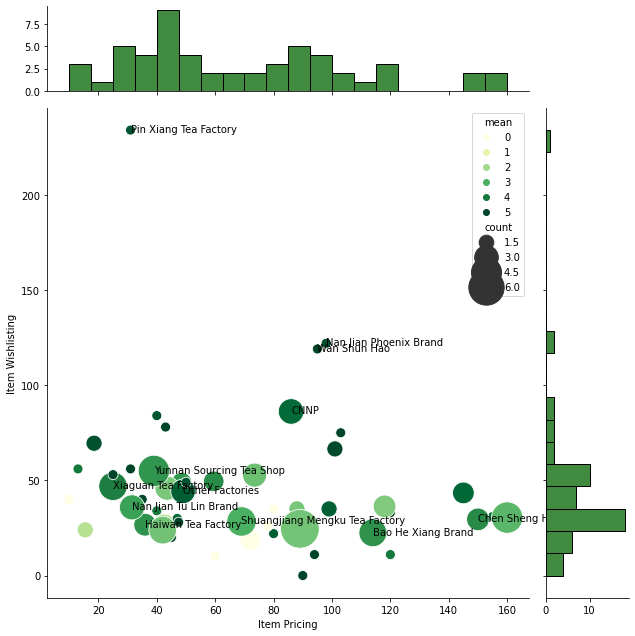

In [39]:
##############################
### Display Pricing X Axis ###
##############################

r = sns.jointplot(data = rawbrands, kind = 'scatter', x = rawbrands.display_price.loc[:,'median'],
                y = rawbrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(rawbrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': rawbrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Item Pricing', 'Item Wishlisting')
# r.ax_joint.annotate()

topmask = ((rawbrands.starscore.loc[:,'mean'] >= 3) & \
            (rawbrands.display_price.loc[:,'count'] > 5)) | \
            (rawbrands.wishlist_score.loc[:, 'median'] > 100)
topbrands = rawbrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.display_price.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS RawBrands')

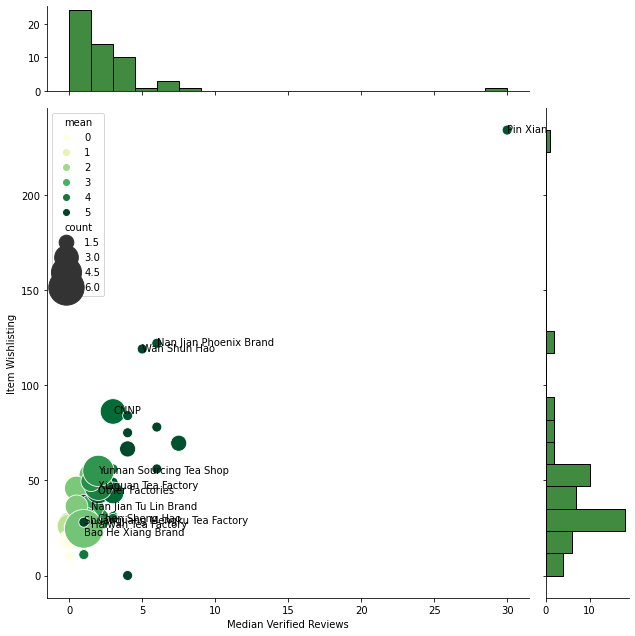

In [40]:
###########################
### Total Review X Axis ###
###########################

r = sns.jointplot(data = rawbrands, kind = 'scatter', x = rawbrands.total_revs.loc[:,'median'],
                y = rawbrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(rawbrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': rawbrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Median Verified Reviews', 'Item Wishlisting')
# r.ax_joint.annotate()

topmask = ((rawbrands.starscore.loc[:,'mean'] >= 3) & \
            (rawbrands.display_price.loc[:,'count'] > 5)) | \
            (rawbrands.wishlist_score.loc[:, 'median'] > 100)
topbrands = rawbrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.total_revs.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS RawBrands')

## Ripe Pu-Erh Brand Examination
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

In [41]:
ripebrands.sort_values([('display_price','count'),('wishlist_score','median')], 
                       ascending = False)

display_price                             \
                                        count    max     min        mean   
brand                                                                      
Yunnan Sourcing Brand Pu-erh               96   89.0    0.00   33.736979   
Menghai Tea Factory                        70  420.0    4.80   47.582857   
Yunnan Sourcing Tea Shop                   37   70.0    4.25   16.193243   
Hai Lang Hao                               20  862.0    6.80  306.390000   
CNNP                                       13  320.0   19.00  120.384615   
Xinghai Tea Factory                        13  180.0   25.00   57.000000   
Haiwan Tea Factory                         11   36.0    6.50   23.272727   
Nan Jian Tu Lin Brand                      11   60.0    6.00   27.409091   
Xiaguan Tea Factory                         9   23.0    5.50   11.933333   
Other Factories                             9   93.0    5.50   38.638889   
Jiu Wan Tea Factory                         7   33.0    4.90   19.271429   
Tian Fu Xiang                               4   43.0   21.00   33.000000   
Big Classic / Gu Ming Xiang                 4   52.0   45.00   49.000000   
Yi Pin Tang                                 3   52.0   35.00   42.000000   
Heng Tong Hao                               3   35.0   33.00   34.333333   
Long Xin Tang Tea House                     3   34.0   32.00   33.333333   
Ye Zhuang Shuang Li Tea Factory             3   26.0   19.00   22.500000   
Tie Guo Li                                  3   33.0    6.00   22.666667   
Yong Pin Hao Tea Factory                    3   28.0   22.00   25.333333   
Lao Cang Pu-erh Tea                         2    4.0    4.00    4.000000   
Cha Nong Hao Brand                          2   69.0   19.00   44.000000   
Huang Ying Teahouse                         2   28.0   10.00   19.000000   
Nan Qiao Tea Factory                        2   65.0   44.00   54.500000   
Yi Shan Tea Factory                         2   62.0   20.00   41.000000   
Golden Horse Brand                          1    6.5    6.50    6.500000   
Langhe Tea Factory                          1    7.0    7.00    7.000000   
Yan Jian Star                               1    8.0    8.00    8.000000   
Mengyang Guoyan                             1   98.0   98.00   98.000000   
Yunnan Sourcing USA                         1   11.0   11.00   11.000000   
Loose Leaf Ripe Pu-Erh Tea                  1    7.0    7.00    7.000000   
Cha Gao                                     1  155.0  155.00  155.000000   
Fu Hai Tea Factory of Menghai               1   65.0   65.00   65.000000   
Wan Ding Tea Factory                        1  130.0  130.00  130.000000   
Mangshi Wu Liang Factory                    1   26.0   26.00   26.000000   
Bao He Xiang Brand                          1   59.0   59.00   59.000000   
Shuangjiang Mengku Tea Factory              1   15.0   15.00   15.000000   
Liming Tea Factory                          1   32.0   32.00   32.000000   
Yong Zhen Brand                             1    5.0    5.00    5.000000   
Hui Man Xin                                 1   24.0   24.00   24.000000   
Gu Fo Tea Factory                           1   60.0   60.00   60.000000   
Shuang Yi Tea Factory                       1   34.0   34.00   34.000000   
Zu Xiang Tea Factory                        1   47.5   47.50   47.500000   
Boyou Tea Factory                           1    6.0    6.00    6.000000   
Guan Zi Zai Tea Company                     1   30.0   30.00   30.000000   

                                        starscore        wishlist_score       \
                                 median      mean median            max  min   
brand                                                                          
Yunnan Sourcing Brand Pu-erh      32.00  3.800000   4.80            174    0   
Menghai Tea Factory               36.00  3.645714   4.80            181    0   
Yunnan Sourcing Tea Shop           7.25  3.816216   4.70   

### Plot & Highlight Top RIPE Brands

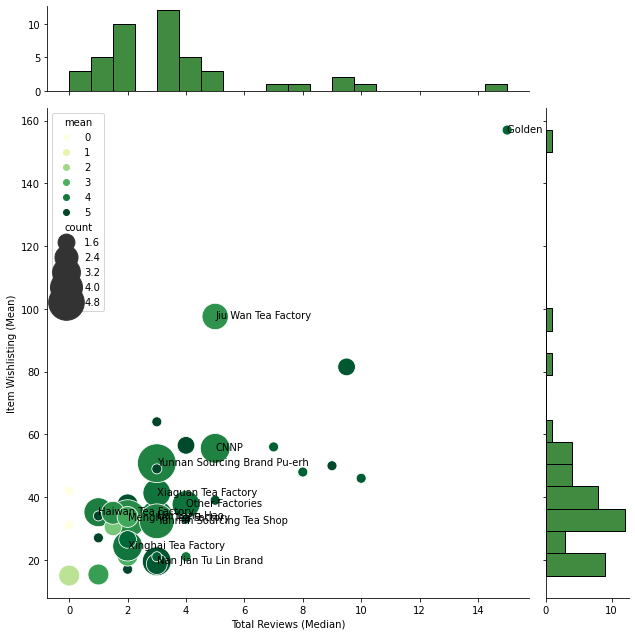

In [42]:
Pu-Erh Recommendations################################
### Median Total Revs X Axis ###
################################

r = sns.jointplot(data = ripebrands, kind = 'scatter', x = ripebrands.total_revs.loc[:,'median'],
                y = ripebrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(ripebrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': ripebrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Total Reviews (Median)', 'Item Wishlisting (Mean)')

topmask = ((ripebrands.starscore.loc[:,'mean'] >= 3) & \
            (ripebrands.display_price.loc[:,'count'] > 5)) | \
            (ripebrands.wishlist_score.loc[:,'median'] > 100)
topbrands = ripebrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.total_revs.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS RipeBrands')

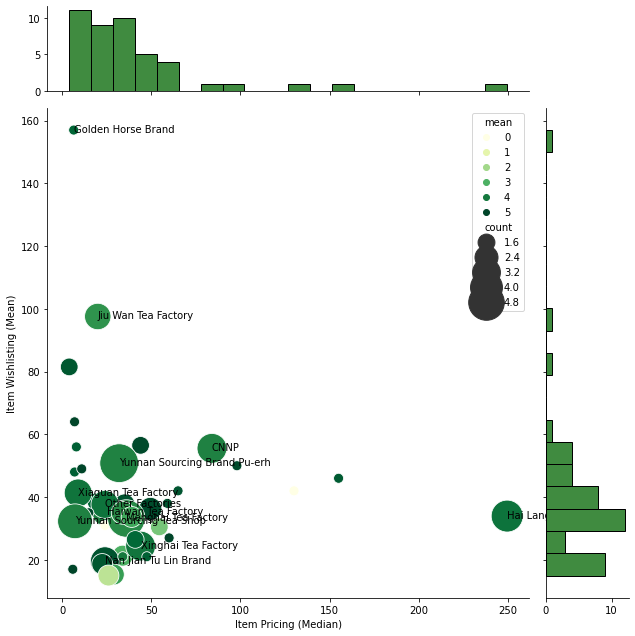

In [43]:
##############################
### Display Pricing X Axis ###
##############################

r = sns.jointplot(data = ripebrands, kind = 'scatter', x = ripebrands.display_price.loc[:,'median'],
                y = ripebrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(ripebrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': ripebrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Item Pricing (Median)', 'Item Wishlisting (Mean)')

topmask = ((ripebrands.starscore.loc[:,'mean'] >= 3) & \
            (ripebrands.display_price.loc[:,'count'] > 5)) | \
            (ripebrands.wishlist_score.loc[:,'median'] > 100)
topbrands = ripebrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.display_price.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS RipeBrands')

In [44]:
topbrands.sort_values([('total_revs','median'), ('wishlist_score','median')], 
                      ascending = False, ignore_index = True)

brand display_price                            \
                                         count    max    min        mean   
0             Golden Horse Brand             1    6.5   6.50    6.500000   
1            Jiu Wan Tea Factory             7   33.0   4.90   19.271429   
2                           CNNP            13  320.0  19.00  120.384615   
3                Other Factories             9   93.0   5.50   38.638889   
4   Yunnan Sourcing Brand Pu-erh            96   89.0   0.00   33.736979   
5            Xiaguan Tea Factory             9   23.0   5.50   11.933333   
6                   Hai Lang Hao            20  862.0   6.80  306.390000   
7       Yunnan Sourcing Tea Shop            37   70.0   4.25   16.193243   
8          Nan Jian Tu Lin Brand            11   60.0   6.00   27.409091   
9            Menghai Tea Factory            70  420.0   4.80   47.582857   
10           Xinghai Tea Factory            13  180.0  25.00   57.000000   
11            Haiwan Tea Factory            11   36.0   6.50   23.272727   

           starscore        wishlist_score                         total_revs  \
    median      mean median            max  min        mean median        max   
0     6.50  4.400000    4.4            157  157  157.000000  157.0         15   
1    20.00  3.514286    4.9            392    0   97.571429   77.0         52   
2    84.00  3.823077    4.5            175    0   55.538462   52.0         20   
3    24.00  4.111111    4.5             58   26   37.666667   38.0          7   
4    32.00  3.800000    4.8            174    0   50.812500   44.0         19   
5     9.00  4.088889    4.5             91    9   41.333333   40.0         16   
6   249.50  4.130000    5.0             75    0   33.950000   35.0          8   
7     7.25  3.816216    4.7            198    0   32.297297   23.0         27   
8    24.00  4.727273    4.8             71    0   19.545455   12.0          8   
9    36.00  3.645714    4.8            181    0   33.185714   27.5         18   
10   44.00  4.076923    4.9             78    0   24.384615   19.0         10   
11   25.00  3.872727    4.7            110    0   35.181818   28.0          9   

                          
   min       mean median  
0   15  15.000000   15.0  
1    0  11.000000    5.0  
2    0   6.153846    5.0  
3    0   3.666667    4.0  
4    0   4.562500    3.0  
5    0   3.777778    3.0  
6    0   3.350000    3.0  
7    0   3.648649    3.0  
8    1   3.636364    3.0  
9    0   2.542857    2.0  
10   0   3.461538    2.0  
11   0   2.636364    1.0

## Non-Pu-Erh Brand Examination
[[Back to Top]](#Yunnan-Sourcing-Web-Scraping)

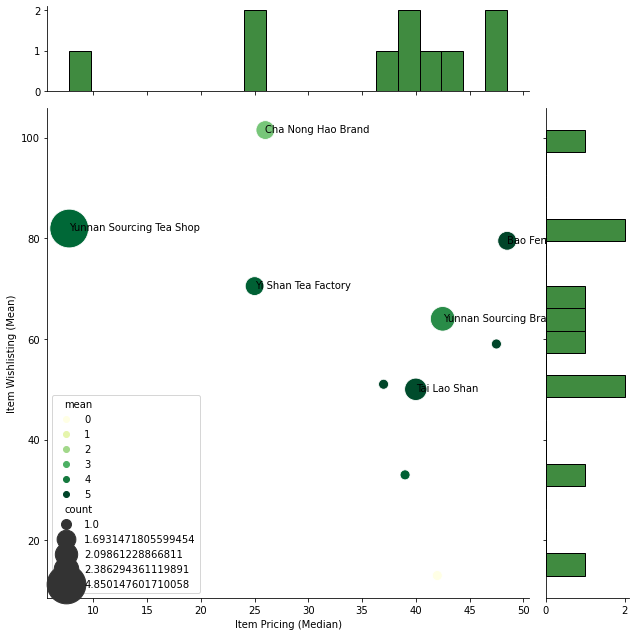

In [45]:
########################
### White Tea Brands ###
########################

r = sns.jointplot(data = whitebrands, kind = 'scatter', x = whitebrands.display_price.loc[:,'median'],
                y = whitebrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(whitebrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': whitebrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Item Pricing (Median)', 'Item Wishlisting (Mean)')

topmask = ((whitebrands.starscore.loc[:,'mean'] >= 3) & \
            (whitebrands.display_price.loc[:,'count'] >= 2)) | \
            (whitebrands.wishlist_score.loc[:,'median'] > 100)
topbrands = whitebrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.display_price.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS WhiteBrands')

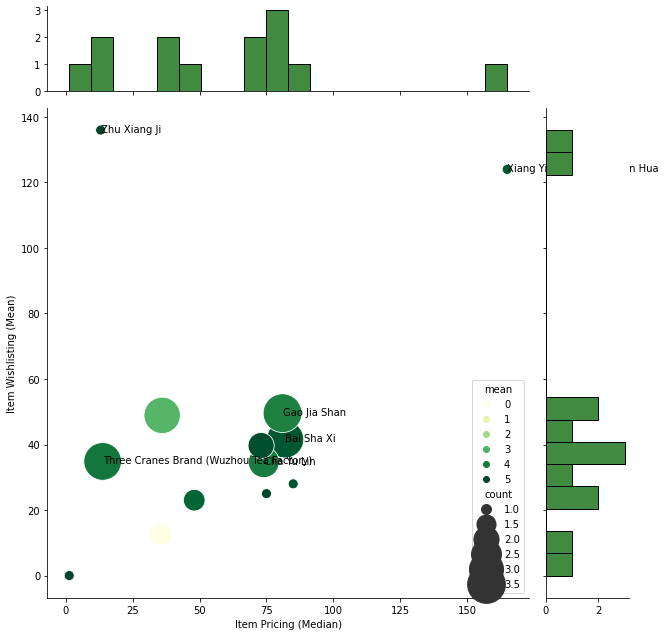

In [46]:
##############################
### Hei Cha Brand Analysis ###
##############################

r = sns.jointplot(data = heibrands, kind = 'scatter', x = heibrands.display_price.loc[:,'median'],
                y = heibrands.wishlist_score.loc[:,'mean'], height = 9,
                marginal_kws= {'bins': 20, "color": "darkgreen"}, marginal_ticks = True, 
                joint_kws= {'size': (np.log(heibrands.display_price.loc[:,'count']) + 1),
                            'sizes': (100, 1500), 'hue': heibrands.starscore.loc[:,'mean'],
                            'palette': 'YlGn'})
r.set_axis_labels('Item Pricing (Median)', 'Item Wishlisting (Mean)')

topmask = ((heibrands.starscore.loc[:,'mean'] >= 3) & \
            (heibrands.display_price.loc[:,'count'] >= 5)) | \
            (heibrands.wishlist_score.loc[:, 'median'] > 100)
topbrands = heibrands.loc[topmask].reset_index()

for i, txt in enumerate(topbrands['brand'].values):
    r.ax_joint.annotate(txt, (topbrands.display_price.loc[:,'median'][i],
                      topbrands.wishlist_score.loc[:,'mean'][i]),
                      xytext=(0,-2), textcoords = 'offset points')
# plt.savefig('YS HeiBrands')

### Plot & Highlight Top NON-PU-ERH Brands

In [47]:
topbrands.sort_values([('total_revs','median'), ('wishlist_score','median')], 
                      ascending = False, ignore_index = True)

brand display_price                \
                                                   count    max    min   
0           Xiang Yi Tea Factory of An Hua             1  165.0  165.0   
1                             Zhu Xiang Ji             1   13.0   13.0   
2                             Gao Jia Shan            14  360.0   40.0   
3                               Bai Sha Xi            11  190.0   13.0   
4  Three Cranes Brand (Wuzhou Tea Factory)            12  166.0    6.5   
5                               Cha Yu Lin             5   90.0    7.0   

                      starscore        wishlist_score                          \
         mean  median      mean median            max  min        mean median   
0  165.000000  165.00  4.600000    4.6            124  124  124.000000  124.0   
1   13.000000   13.00  5.000000    5.0            136  136  136.000000  136.0   
2  105.428571   81.00  3.835714    4.4            101    0   49.571429   56.0   
3   76.818182   82.00  4.663636    4.7            100    7   41.545455   32.0   
4   45.250000   13.75  4.033333    4.9             67    9   34.833333   31.5   
5   64.600000   74.00  3.920000    5.0             55   19   34.600000   28.0   

  total_revs                        
         max min       mean median  
0         18  18  18.000000   18.0  
1          5   5   5.000000    5.0  
2         12   0   4.928571    4.5  
3         10   1   4.818182    4.0  
4          6   0   2.666667    2.0  
5          8   0   2.800000    2.0